In [1]:
from learning import learn_model
from agent_distribution import AgentDistribution
from utils import compute_continuity_noise, fixed_point_interpolation_true_distribution
from optimal_beta import optimal_beta_expected_policy_loss 

import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_types = 10
d = 2
etas = np.random.uniform(0.3, 0.8, n_types * d).reshape(n_types, d, 1)
gammas = np.random.uniform(5., 8., n_types *d).reshape(n_types, d, 1)
dic = {"etas":etas, "gammas":gammas}
agent_dist = AgentDistribution(n=50000, d=d, n_types=n_types, types=dic, prop=None)
sigma = compute_continuity_noise(agent_dist)
q = 0.7
f = fixed_point_interpolation_true_distribution(agent_dist, sigma, 0.7, plot=False, savefig=None)

Computing fixed points...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [01:08<00:00,  1.38s/it]


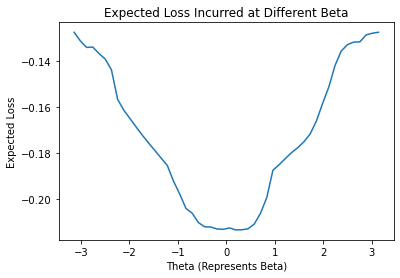

Opt Theta: 0.19234240736264008
Min Loss: -0.2133409140547814


In [3]:
min_loss, opt_beta, opt_s_beta, thetas, losses = optimal_beta_expected_policy_loss(agent_dist, sigma, f, plot=True)
opt_theta = np.arctan2(opt_beta[1], opt_beta[0])
print("Opt Theta: {}".format(opt_theta.item()))
print("Min Loss: {}".format(min_loss))

In [ ]:
emp_thetas, emp_losses = learn_model(agent_dist, sigma, q, f, learning_rate=0.1, max_iter=500)

Loss: -0.130662738051227 Theta:3.0915926535897933 Gradient: -0.03118631760422441
Loss: -0.13111195275019466 Theta:3.122778971194018 Gradient: -0.04457527336776901
Loss: -0.13099374675402264 Theta:-3.1158310626177994 Gradient: 0.04649223857805035
Loss: -0.13084762605258465 Theta:3.1208620059837364 Gradient: 0.020639455922384586
Loss: -0.13085501409069594 Theta:3.1002225500613516 Gradient: 0.0461307096765603
Loss: -0.1311323191756458 Theta:3.054091840384791 Gradient: -0.07688860396447295
Loss: -0.13129051886289891 Theta:3.130980444349264 Gradient: -0.05195048904573252
Loss: -0.13118763665087904 Theta:-3.1002543737845896 Gradient: 0.09776471168325718
Loss: -0.1309820120632465 Theta:3.0851662217117397 Gradient: -0.09722565610681244
Loss: -0.13105049844602396 Theta:-3.100793429361034 Gradient: -0.06589250081038212
Loss: -0.13144858905449608 Theta:-3.034900928550652 Gradient: -0.06898806409924418
Loss: -0.1318746934790155 Theta:-2.9659128644514077 Gradient: -0.0729827398598678
Loss: -0.13309

In [ ]:
plt.plot(list(range(len(emp_losses))), emp_losses)

In [ ]:
plt.plot(list(range(len(emp_thetas))), emp_thetas)